In [1]:
from statsbombpy import sb

In [2]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import re
import requests
import seaborn as sns
import os
import datetime
import json

In [155]:
from matplotlib.colors import ListedColormap
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker, Sbopen)
import math
from matplotlib.colors import to_rgba

In [4]:
comp = sb.matches(competition_id= 37, season_id= 90)

In [5]:
comp[(comp.home_score + comp.away_score) >= 5]

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
3,3775570,2021-03-28,13:30:00.000,England - FA Women's Super League,2020/2021,Brighton & Hove Albion WFC,Everton LFC,0,5,available,...,2021-06-13T16:17:31.694,18,Regular Season,Broadfield Stadium,Christina Hattersley,Hope Patricia Powell,Willie Kirk,1.1.0,2,2
5,3775579,2021-05-02,15:00:00.000,England - FA Women's Super League,2020/2021,Reading WFC,Brighton & Hove Albion WFC,3,2,available,...,2021-06-13T16:17:31.694,21,Regular Season,Select Car Leasing Stadium,Jane Simms,Kelly Chambers,Hope Patricia Powell,1.1.0,2,2
7,3775622,2021-04-25,13:30:00.000,England - FA Women's Super League,2020/2021,Manchester United,Tottenham Hotspur Women,4,1,available,...,2021-06-13T16:17:31.694,20,Regular Season,Leigh Sports Village Stadium,Christina Hattersley,Casey Stoney,Rehanne Skinner,1.1.0,2,2
16,3764237,2020-09-13,15:00:00.000,England - FA Women's Super League,2020/2021,Birmingham City WFC,Manchester United,2,5,available,...,2021-06-13T16:17:31.694,2,Regular Season,\tARMCO Arena,Lucy Oliver,Carla Ward,Casey Stoney,1.1.0,2,2
21,3764233,2020-09-06,13:30:00.000,England - FA Women's Super League,2020/2021,Arsenal WFC,Reading WFC,6,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Meadow Park,Amy Fearn,Joseph Montemurro,Kelly Chambers,1.1.0,2,2
23,3775593,2021-05-09,15:30:00.000,England - FA Women's Super League,2020/2021,Chelsea FCW,Reading WFC,5,0,available,...,2021-06-13T16:17:31.694,22,Regular Season,Kingsmeadow,Stacey Pearson,Emma Hayes,Kelly Chambers,1.1.0,2,2
28,3775606,2021-01-10,15:00:00.000,England - FA Women's Super League,2020/2021,Reading WFC,Chelsea FCW,0,5,available,...,2021-06-13T16:17:31.694,11,Regular Season,Select Car Leasing Stadium,Abigail Byrne,Kelly Chambers,Emma Hayes,1.1.0,2,2
31,3775607,2021-03-08,21:15:00.000,England - FA Women's Super League,2020/2021,Bristol City WFC,Reading WFC,3,2,available,...,2021-06-13T16:17:31.694,16,Regular Season,Ashton Gate,Rebecca Welch,Matt Beard,Kelly Chambers,1.1.0,2,2
34,3764235,2020-09-13,13:30:00.000,England - FA Women's Super League,2020/2021,Chelsea FCW,Bristol City WFC,9,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Kingsmeadow,Stacey Pearson,Emma Hayes,Tanya Oxtoby,1.1.0,2,2
39,3775543,2020-10-11,13:30:00.000,England - FA Women's Super League,2020/2021,Brighton & Hove Albion WFC,Arsenal WFC,0,5,available,...,2021-06-13T16:17:31.694,4,Regular Season,Broadfield Stadium,Kirsty Dowle,Hope Patricia Powell,Joseph Montemurro,1.1.0,2,2


In [6]:
comp[comp.match_id == 3775622]

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
7,3775622,2021-04-25,13:30:00.000,England - FA Women's Super League,2020/2021,Manchester United,Tottenham Hotspur Women,4,1,available,...,2021-06-13T16:17:31.694,20,Regular Season,Leigh Sports Village Stadium,Christina Hattersley,Casey Stoney,Rehanne Skinner,1.1.0,2,2


In [7]:
sb.events(match_id=3775622, split=True, flatten_attrs=False).keys()

dict_keys(['starting_xis', 'half_starts', 'passes', 'ball_receipts', 'carrys', 'pressures', 'miscontrols', 'dispossesseds', 'duels', 'foul_committeds', 'foul_wons', 'interceptions', 'shots', 'blocks', 'goal_keepers', 'dribbles', 'ball_recoverys', 'dribbled_pasts', 'tactical_shifts', 'clearances', '50/50s', 'bad_behaviours', 'injury_stoppages', 'referee_ball_drops', 'half_ends', 'substitutions', 'offsides'])

In [8]:
event = sb.events(match_id=3775622, split=True, flatten_attrs=False)['passes']

In [14]:
event[event.possession_team == 'Manchester United']

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,duration,related_events,pass,match_id,possession_team_id,team_id,player_id,under_pressure,off_camera,counterpress
0,76fa7725-9b5f-43ea-81b1-1bd7c9829c34,5,1,00:00:00.200,0,0,Pass,2,Manchester United,From Kick Off,...,1.033964,[846dcf17-097a-4e53-b2e8-e42e6ccbd973],"{'recipient': {'id': 31540, 'name': 'Katie Zel...",3775622,1475,1475,6817,NaN,NaN,NaN
1,f0389273-b8c8-4a92-a002-677f0742855e,8,1,00:00:02.256,0,2,Pass,2,Manchester United,From Kick Off,...,1.606682,[35af65b6-024e-4d24-b207-f7ce93bc1ac8],"{'recipient': {'id': 46639, 'name': 'Ona Batll...",3775622,1475,1475,31540,NaN,NaN,NaN
2,a86ad591-93e7-43d5-b38a-12033adbabe1,12,1,00:00:04.166,0,4,Pass,2,Manchester United,From Kick Off,...,2.113377,[3b60f30b-5644-4b19-800a-53d86c4fa698],"{'recipient': {'id': 31533, 'name': 'Amy Turne...",3775622,1475,1475,46639,NaN,NaN,NaN
3,60d7e1e3-c4a5-448e-bba6-7192150a152d,15,1,00:00:09.220,0,9,Pass,2,Manchester United,From Kick Off,...,1.702840,[a488c1fe-1df6-49d9-8a02-9efa96d6bcb6],"{'recipient': {'id': 46639, 'name': 'Ona Batll...",3775622,1475,1475,31533,NaN,NaN,NaN
4,9c174378-1962-4d2d-9824-2f150366384c,18,1,00:00:12.974,0,12,Pass,2,Manchester United,From Kick Off,...,2.381125,[1a22ae42-fc31-4f89-86cb-038d1d78b896],"{'recipient': {'id': 31533, 'name': 'Amy Turne...",3775622,1475,1475,46639,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,f30faef6-825b-4b25-9f0d-ce5746bad098,3174,2,00:45:46.057,90,46,Pass,208,Manchester United,Regular Play,...,1.435438,"[5cb70b50-2f83-46d7-8bb1-5f3c4fde2940, c750e25...","{'recipient': {'id': 4653, 'name': 'Jane Ross'...",3775622,1475,1475,10654,True,NaN,NaN
829,fa287f47-98ca-45cf-bff7-37046e54de1a,3178,2,00:45:50.391,90,50,Pass,208,Manchester United,Regular Play,...,0.549911,"[0821aaf9-3489-4493-b86d-e1b481ff121d, b84c14f...","{'recipient': {'id': 31532, 'name': 'Kirsty Ha...",3775622,1475,1475,4653,True,NaN,NaN
830,80b9d283-966c-4624-9a6a-20ab37bd360b,3181,2,00:46:07.193,91,7,Pass,209,Manchester United,From Throw In,...,3.575808,"[92cb6009-f845-41a6-aa9c-de09aa2c103b, da678d9...","{'recipient': {'id': 84765, 'name': 'Carrie Jo...",3775622,1475,1475,4636,NaN,NaN,NaN
845,09a76d82-2408-48c9-be14-56e770186fec,3232,2,00:48:14.274,93,14,Pass,212,Manchester United,From Kick Off,...,2.235385,[db7e8c72-54b0-42f3-acdc-644cb6570327],"{'recipient': {'id': 31533, 'name': 'Amy Turne...",3775622,1475,1475,84765,NaN,True,NaN


In [17]:
event.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'pass',
       'match_id', 'possession_team_id', 'team_id', 'player_id',
       'under_pressure', 'off_camera', 'counterpress'],
      dtype='object')

In [54]:
event.type.unique()

array(['Pass'], dtype=object)

In [57]:
event.groupby('possession_team')['pass'].count()

possession_team
Manchester United          424
Tottenham Hotspur Women    423
Name: pass, dtype: int64

In [21]:
event['pass']

0      {'recipient': {'id': 31540, 'name': 'Katie Zel...
1      {'recipient': {'id': 46639, 'name': 'Ona Batll...
2      {'recipient': {'id': 31533, 'name': 'Amy Turne...
3      {'recipient': {'id': 46639, 'name': 'Ona Batll...
4      {'recipient': {'id': 31533, 'name': 'Amy Turne...
                             ...                        
842    {'recipient': {'id': 53440, 'name': 'Esther Mo...
843    {'length': 29.75668, 'angle': -1.4393551, 'hei...
844    {'recipient': {'id': 21048, 'name': 'Rosella A...
845    {'recipient': {'id': 31533, 'name': 'Amy Turne...
846    {'recipient': {'id': 31534, 'name': 'Ella Toon...
Name: pass, Length: 847, dtype: object

In [9]:
recipient = event['pass'].apply(pd.Series)

In [47]:
recipient[['recipient', 'length', 'angle', 'height', 'end_location', 'type',
       'body_part', 'outcome', 'assisted_shot_id', 'shot_assist',
       'through_ball', 'technique', 'aerial_won', 'cross', 'cut_back']]

,recipient,length,angle,height,end_location,type,body_part,outcome,assisted_shot_id,shot_assist,through_ball,technique,aerial_won,cross,cut_back
0,"{'id': 31540, 'name': 'Katie Zelem'}",12.277622,2.783775,"{'id': 1, 'name': 'Ground Pass'}","[49.5, 44.4]","{'id': 65, 'name': 'Kick Off'}","{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'id': 46639, 'name': 'Ona Batlle Pascual'}",25.234303,1.674014,"{'id': 1, 'name': 'Ground Pass'}","[45.8, 69.5]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'id': 31533, 'name': 'Amy Turner'}",17.725970,-2.472138,"{'id': 1, 'name': 'Ground Pass'}","[32.1, 58.7]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'id': 46639, 'name': 'Ona Batlle Pascual'}",21.918030,1.086743,"{'id': 1, 'name': 'Ground Pass'}","[47.5, 77.7]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'id': 31533, 'name': 'Amy Turner'}",13.371985,-2.684634,"{'id': 1, 'name': 'Ground Pass'}","[35.1, 64.9]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,"{'id': 53440, 'name': 'Esther Morgan'}",18.346935,1.185229,"{'id': 1, 'name': 'Ground Pass'}","[94.7, 65.2]",NaN,"{'id': 106, 'name': 'No Touch'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
843,NaN,29.756680,-1.439355,"{'id': 3, 'name': 'High Pass'}","[105.9, 35.1]",NaN,"{'id': 40, 'name': 'Right Foot'}","{'id': 9, 'name': 'Incomplete'}",NaN,NaN,NaN,NaN,NaN,True,NaN
844,"{'id': 21048, 'name': 'Rosella Ayane'}",8.260751,-1.449444,"{'id': 1, 'name': 'Ground Pass'}","[88.4, 37.1]","{'id': 66, 'name': 'Recovery'}","{'id': 38, 'name': 'Left Foot'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
845,"{'id': 31533, 'name': 'Amy Turner'}",34.866173,3.017949,"{'id': 1, 'name': 'Ground Pass'}","[25.4, 44.3]","{'id': 65, 'name': 'Kick Off'}","{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
event['pass'].apply(pd.Series)

,recipient,length,angle,height,end_location,type,body_part,outcome,assisted_shot_id,shot_assist,...,technique,aerial_won,cross,cut_back,goal_assist,switch,inswinging,miscommunication,deflected,no_touch
0,"{'id': 31540, 'name': 'Katie Zelem'}",12.277622,2.783775,"{'id': 1, 'name': 'Ground Pass'}","[49.5, 44.4]","{'id': 65, 'name': 'Kick Off'}","{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'id': 46639, 'name': 'Ona Batlle Pascual'}",25.234303,1.674014,"{'id': 1, 'name': 'Ground Pass'}","[45.8, 69.5]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'id': 31533, 'name': 'Amy Turner'}",17.725970,-2.472138,"{'id': 1, 'name': 'Ground Pass'}","[32.1, 58.7]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'id': 46639, 'name': 'Ona Batlle Pascual'}",21.918030,1.086743,"{'id': 1, 'name': 'Ground Pass'}","[47.5, 77.7]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'id': 31533, 'name': 'Amy Turner'}",13.371985,-2.684634,"{'id': 1, 'name': 'Ground Pass'}","[35.1, 64.9]",NaN,"{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,"{'id': 53440, 'name': 'Esther Morgan'}",18.346935,1.185229,"{'id': 1, 'name': 'Ground Pass'}","[94.7, 65.2]",NaN,"{'id': 106, 'name': 'No Touch'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
843,NaN,29.756680,-1.439355,"{'id': 3, 'name': 'High Pass'}","[105.9, 35.1]",NaN,"{'id': 40, 'name': 'Right Foot'}","{'id': 9, 'name': 'Incomplete'}",NaN,NaN,...,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844,"{'id': 21048, 'name': 'Rosella Ayane'}",8.260751,-1.449444,"{'id': 1, 'name': 'Ground Pass'}","[88.4, 37.1]","{'id': 66, 'name': 'Recovery'}","{'id': 38, 'name': 'Left Foot'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
845,"{'id': 31533, 'name': 'Amy Turner'}",34.866173,3.017949,"{'id': 1, 'name': 'Ground Pass'}","[25.4, 44.3]","{'id': 65, 'name': 'Kick Off'}","{'id': 40, 'name': 'Right Foot'}",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
name_id = recipient['recipient'].apply(pd.Series)
name_id

,0,id,name
0,NaN,31540.0,Katie Zelem
1,NaN,46639.0,Ona Batlle Pascual
2,NaN,31533.0,Amy Turner
3,NaN,46639.0,Ona Batlle Pascual
4,NaN,31533.0,Amy Turner
...,...,...,...
842,NaN,53440.0,Esther Morgan
843,NaN,NaN,NaN
844,NaN,21048.0,Rosella Ayane
845,NaN,31533.0,Amy Turner


In [11]:
final_name_id = name_id[['id', 'name']]
final_name_id = final_name_id.rename(columns = {'id': 'name_id', 'name': 'end_player'})

In [12]:
end_location = recipient['end_location'].apply(pd.Series)
end_location = end_location.rename(columns = {0: 'end_x', 1 : 'end_y'})

In [13]:
name_end = pd.concat([final_name_id,end_location], 1)
name_end

,name_id,end_player,end_x,end_y
0,31540.0,Katie Zelem,49.5,44.4
1,46639.0,Ona Batlle Pascual,45.8,69.5
2,31533.0,Amy Turner,32.1,58.7
3,46639.0,Ona Batlle Pascual,47.5,77.7
4,31533.0,Amy Turner,35.1,64.9
...,...,...,...,...
842,53440.0,Esther Morgan,94.7,65.2
843,NaN,NaN,105.9,35.1
844,21048.0,Rosella Ayane,88.4,37.1
845,31533.0,Amy Turner,25.4,44.3


In [14]:
final_df = pd.concat([event, name_end], 1)

In [68]:
final_df.columns

Index([                'id',              'index',             'period',
                'timestamp',             'minute',             'second',
                     'type',         'possession',    'possession_team',
             'play_pattern',               'team',             'player',
                 'position',           'location',           'duration',
           'related_events',               'pass',           'match_id',
       'possession_team_id',            'team_id',          'player_id',
           'under_pressure',         'off_camera',       'counterpress',
                       'id',               'name',                    0,
                          1,                    0,                    1],
      dtype='object')

In [15]:
location = final_df['location'].apply(pd.Series)
location = location.rename(columns = {0 : 'start_x', 1 : 'start_y'})

In [16]:
location

,start_x,start_y
0,61.0,40.1
1,48.4,44.4
2,46.0,69.7
3,37.3,58.3
4,47.1,70.8
...,...,...
842,87.8,48.2
843,102.0,64.6
844,87.4,45.3
845,60.0,40.0


In [110]:
final_df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'start_player',
       'position', 'location', 'duration', 'related_events', 'pass',
       'match_id', 'possession_team_id', 'team_id', 'player_id',
       'under_pressure', 'off_camera', 'counterpress', 'name_id', 'end_player',
       'end_x', 'end_y', 'start_x', 'start_y', 'start_x', 'start_y', 'start_x',
       'start_y'],
      dtype='object')

In [20]:
final_df = final_df.rename(columns = {'player' : 'start_player'})

In [17]:
final_df = pd.concat([ final_df, location], 1)
final_df

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,player_id,under_pressure,off_camera,counterpress,name_id,end_player,end_x,end_y,start_x,start_y
0,76fa7725-9b5f-43ea-81b1-1bd7c9829c34,5,1,00:00:00.200,0,0,Pass,2,Manchester United,From Kick Off,...,6817,NaN,NaN,NaN,31540.0,Katie Zelem,49.5,44.4,61.0,40.1
1,f0389273-b8c8-4a92-a002-677f0742855e,8,1,00:00:02.256,0,2,Pass,2,Manchester United,From Kick Off,...,31540,NaN,NaN,NaN,46639.0,Ona Batlle Pascual,45.8,69.5,48.4,44.4
2,a86ad591-93e7-43d5-b38a-12033adbabe1,12,1,00:00:04.166,0,4,Pass,2,Manchester United,From Kick Off,...,46639,NaN,NaN,NaN,31533.0,Amy Turner,32.1,58.7,46.0,69.7
3,60d7e1e3-c4a5-448e-bba6-7192150a152d,15,1,00:00:09.220,0,9,Pass,2,Manchester United,From Kick Off,...,31533,NaN,NaN,NaN,46639.0,Ona Batlle Pascual,47.5,77.7,37.3,58.3
4,9c174378-1962-4d2d-9824-2f150366384c,18,1,00:00:12.974,0,12,Pass,2,Manchester United,From Kick Off,...,46639,NaN,NaN,NaN,31533.0,Amy Turner,35.1,64.9,47.1,70.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,59f1894c-f144-45a2-a227-b9dadbf1a704,3219,2,00:46:46.629,91,46,Pass,210,Tottenham Hotspur Women,Regular Play,...,31550,NaN,NaN,NaN,53440.0,Esther Morgan,94.7,65.2,87.8,48.2
843,6e18d9ab-ba3c-4a7d-ad84-bac7d90d3da7,3222,2,00:46:50.090,91,50,Pass,210,Tottenham Hotspur Women,Regular Play,...,53440,NaN,NaN,NaN,NaN,NaN,105.9,35.1,102.0,64.6
844,c20e6248-2155-4c2c-b2bc-7f3960cdf743,3224,2,00:46:53.647,91,53,Pass,210,Tottenham Hotspur Women,Regular Play,...,5078,NaN,NaN,NaN,21048.0,Rosella Ayane,88.4,37.1,87.4,45.3
845,09a76d82-2408-48c9-be14-56e770186fec,3232,2,00:48:14.274,93,14,Pass,212,Manchester United,From Kick Off,...,84765,NaN,True,NaN,31533.0,Amy Turner,25.4,44.3,60.0,40.0


In [18]:
final_df = final_df[final_df.possession_team == 'Manchester United']

In [117]:
final_df

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,player_id,under_pressure,off_camera,counterpress,name_id,end_player,end_x,end_y,start_x,start_y
0,76fa7725-9b5f-43ea-81b1-1bd7c9829c34,5,1,00:00:00.200,0,0,Pass,2,Manchester United,From Kick Off,...,6817,NaN,NaN,NaN,31540.0,Katie Zelem,49.5,44.4,61.0,40.1
1,f0389273-b8c8-4a92-a002-677f0742855e,8,1,00:00:02.256,0,2,Pass,2,Manchester United,From Kick Off,...,31540,NaN,NaN,NaN,46639.0,Ona Batlle Pascual,45.8,69.5,48.4,44.4
2,a86ad591-93e7-43d5-b38a-12033adbabe1,12,1,00:00:04.166,0,4,Pass,2,Manchester United,From Kick Off,...,46639,NaN,NaN,NaN,31533.0,Amy Turner,32.1,58.7,46.0,69.7
3,60d7e1e3-c4a5-448e-bba6-7192150a152d,15,1,00:00:09.220,0,9,Pass,2,Manchester United,From Kick Off,...,31533,NaN,NaN,NaN,46639.0,Ona Batlle Pascual,47.5,77.7,37.3,58.3
4,9c174378-1962-4d2d-9824-2f150366384c,18,1,00:00:12.974,0,12,Pass,2,Manchester United,From Kick Off,...,46639,NaN,NaN,NaN,31533.0,Amy Turner,35.1,64.9,47.1,70.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,f30faef6-825b-4b25-9f0d-ce5746bad098,3174,2,00:45:46.057,90,46,Pass,208,Manchester United,Regular Play,...,10654,True,NaN,NaN,4653.0,Jane Ross,52.0,58.4,35.5,54.4
829,fa287f47-98ca-45cf-bff7-37046e54de1a,3178,2,00:45:50.391,90,50,Pass,208,Manchester United,Regular Play,...,4653,True,NaN,NaN,31532.0,Kirsty Hanson,67.1,72.1,55.1,73.2
830,80b9d283-966c-4624-9a6a-20ab37bd360b,3181,2,00:46:07.193,91,7,Pass,209,Manchester United,From Throw In,...,4636,NaN,NaN,NaN,84765.0,Carrie Jones,98.8,65.7,65.6,80.0
845,09a76d82-2408-48c9-be14-56e770186fec,3232,2,00:48:14.274,93,14,Pass,212,Manchester United,From Kick Off,...,84765,NaN,True,NaN,31533.0,Amy Turner,25.4,44.3,60.0,40.0


In [21]:
final_df.groupby('start_player').mean('start_x')

,index,period,minute,second,possession,duration,match_id,possession_team_id,team_id,player_id,name_id,end_x,end_y,start_x,start_y
start_player,,,,,,,,,,,,,,,
Alanna Stephanie Kennedy,1587.000000,1.000000,40.000000,54.000000,94.000000,1.357109,3775622.0,1475.0,749.0,5078.0,31551.000000,11.400000,47.200000,7.100000,54.200000
Amy Turner,1408.108108,1.378378,36.810811,24.486486,90.054054,1.632032,3775622.0,1475.0,1475.0,31533.0,31726.085714,36.451351,51.829730,31.578378,53.824324
Ashleigh Neville,1972.000000,1.750000,50.500000,50.000000,118.250000,1.912619,3775622.0,1475.0,749.0,4848.0,24860.500000,44.325000,62.475000,27.300000,63.500000
Carrie Jones,3190.000000,2.000000,91.000000,32.500000,209.000000,1.990467,3775622.0,1475.0,1475.0,84765.0,18084.500000,61.350000,58.600000,73.850000,48.500000
Christen Annemarie Press,1214.190476,1.285714,31.857143,30.428571,81.952381,2.028341,3775622.0,1475.0,1475.0,6817.0,28356.894737,79.923810,46.661905,70.738095,52.176190
Ella Toone,1633.243902,1.439024,42.560976,32.756098,104.219512,1.440667,3775622.0,1475.0,1475.0,31534.0,30576.783784,76.441463,56.141463,70.673171,55.253659
Jackie Groenen,2848.285714,2.000000,79.357143,24.642857,185.071429,2.152514,3775622.0,1475.0,1475.0,10654.0,29851.857143,54.407143,50.907143,41.492857,45.114286
Jane Ross,2758.333333,2.000000,76.333333,41.333333,177.166667,1.506096,3775622.0,1475.0,1475.0,4653.0,29609.500000,69.566667,44.800000,65.116667,43.500000
Jessica Naz,875.666667,1.000000,22.333333,9.000000,60.000000,2.423823,3775622.0,1475.0,749.0,61467.0,31702.000000,76.566667,32.966667,79.833333,53.633333


In [128]:
# average_locations = 
mean_x = final_df.groupby('start_player').mean()['start_x']
mean_y = final_df.groupby('start_player').mean()['start_y']
mean_count = final_df.groupby('start_player').count()['start_y']

In [136]:
mean_count.name

'count'

In [135]:
mean_count = mean_count.rename('count')

In [137]:
average_locs_and_count = pd.concat([mean_x, mean_y, mean_count], axis=1)

In [106]:
average_locs_and_count.rename(columns={average_locs_and_count.columns.tolist()[2]: 'count'},  inplace=True)

In [138]:
average_locs_and_count

,start_x,start_y,count
start_player,,,
Alanna Stephanie Kennedy,7.100000,54.200000,1
Amy Turner,31.578378,53.824324,37
Ashleigh Neville,27.300000,63.500000,4
Carrie Jones,73.850000,48.500000,2
Christen Annemarie Press,70.738095,52.176190,21
Ella Toone,70.673171,55.253659,41
Jackie Groenen,41.492857,45.114286,14
Jane Ross,65.116667,43.500000,6
Jessica Naz,79.833333,53.633333,3


In [139]:
average_locs_and_count = average_locs_and_count[average_locs_and_count['count'] > 15]

In [142]:
passes_between = final_df.groupby(['start_player', 'end_player']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

average_locs_and_count.index = average_locs_and_count.index.astype(str)  

passes_between = passes_between.merge(average_locs_and_count, left_on='start_player', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='end_player', right_index=True,
                                      suffixes=['', '_end'])

In [143]:
passes_between

,start_player,end_player,pass_count,start_x,start_y,count,start_x_end,start_y_end,count_end
1,Amy Turner,Ella Toone,3,31.578378,53.824324,37,70.673171,55.253659,41
14,Christen Annemarie Press,Ella Toone,6,70.738095,52.176190,21,70.673171,55.253659,41
42,Jessica Sigsworth,Ella Toone,2,75.788889,68.822222,18,70.673171,55.253659,41
49,Katie Zelem,Ella Toone,3,50.623077,51.561538,26,70.673171,55.253659,41
57,Kirsty Hanson,Ella Toone,5,91.425000,33.655000,20,70.673171,55.253659,41
...,...,...,...,...,...,...,...,...,...
64,Kirsty Smith,Amy Turner,2,64.984615,10.758974,39,31.578378,53.824324,37
81,Lucy Staniforth,Amy Turner,2,72.500000,30.056000,25,31.578378,53.824324,37
90,Mary Alexandra Earps,Amy Turner,8,14.745161,43.022581,31,31.578378,53.824324,37
97,Millie Turner,Amy Turner,6,38.933333,25.517949,39,31.578378,53.824324,37


In [148]:
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                         / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)

E:\ANACONDA3\env\cs4811\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [149]:
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                         / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)

E:\ANACONDA3\env\cs4811\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [160]:
average_locs_and_count['shirt_num'] = ['4', '24', '7', '9', '10', '18', '20', '37', '27', '21', '2']

E:\ANACONDA3\env\cs4811\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [161]:
average_locs_and_count

,start_x,start_y,count,marker_size,shirt_num
start_player,,,,,
Amy Turner,31.578378,53.824324,37,1608.695652,4
Christen Annemarie Press,70.738095,52.176190,21,913.043478,24
Ella Toone,70.673171,55.253659,41,1782.608696,7
Jessica Sigsworth,75.788889,68.822222,18,782.608696,9
Katie Zelem,50.623077,51.561538,26,1130.434783,10
Kirsty Hanson,91.425000,33.655000,20,869.565217,18
Kirsty Smith,64.984615,10.758974,39,1695.652174,20
Lucy Staniforth,72.500000,30.056000,25,1086.956522,37
Mary Alexandra Earps,14.745161,43.022581,31,1347.826087,27


In [156]:
MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

In [163]:
TEAM = "Manchester United Women's"
FORMATION = '4-2-3-1'
OPPONENT = 'versus Tottenham Hotspurs (H), 2020/21 FA WSL'

In [179]:
URL = "https://raw.githubusercontent.com/google/fonts/main/ofl/oswald/Oswald%5Bwght%5D.ttf"
oswald_regular = FontManager(URL)

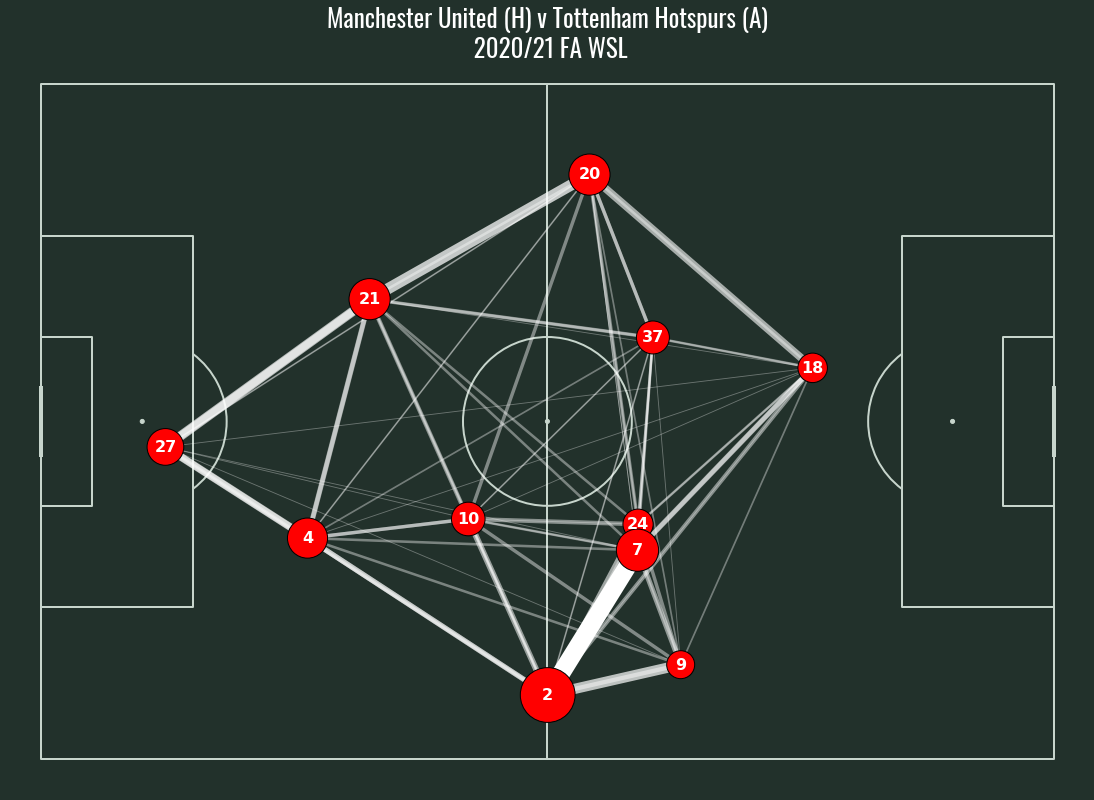

In [183]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22312b")
pass_lines = pitch.lines(passes_between.start_x, passes_between.start_y,
                         passes_between.start_x_end, passes_between.start_y_end, lw=passes_between.width,
                         color=color, zorder=1, ax=ax)
pass_nodes = pitch.scatter(average_locs_and_count.start_x, average_locs_and_count.start_y,
                           s=average_locs_and_count.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=ax)
for index, row in average_locs_and_count.iterrows():
    pitch.annotate(row.shirt_num, xy=(row.start_x, row.start_y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=ax)
# TITLE_TEXT = f'{TEAM}, {FORMATION} formation'
# ax.set_title(0.5, 0.7, TITLE_TEXT, color='#c7d5cc',
#                   va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=30)
# ax.set_title(0.5, 0.25, OPPONENT, color='#c7d5cc',
#                   va='center', ha='center', fontproperties=robotto_regular.prop, fontsize=18)
ax.set_title("Manchester United (H) v Tottenham Hotspurs (A)\n 2020/21 FA WSL", fontsize=25, color="w", fontproperties=oswald_regular.prop, fontweight='bold', pad=-8);